In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Exploration and Preprocessing

In [3]:
data=pd.read_csv("Reviews.csv",encoding='ISO-8859-1')

In [4]:
data

,#NAME?,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   #NAME?                  568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
data.isna().sum()

#NAME?                     0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
#Dropping null values
data.dropna(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data["Time"]=data["Time"].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   #NAME?                  568411 non-null  int64         
 1   ProductId               568411 non-null  object        
 2   UserId                  568411 non-null  object        
 3   ProfileName             568411 non-null  object        
 4   HelpfulnessNumerator    568411 non-null  int64         
 5   HelpfulnessDenominator  568411 non-null  int64         
 6   Score                   568411 non-null  int64         
 7   Time                    568411 non-null  datetime64[ns]
 8   Summary                 568411 non-null  object        
 9   Text                    568411 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 47.7+ MB


In [11]:
data

,#NAME?,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [12]:
data.describe()

,#NAME?,HelpfulnessNumerator,HelpfulnessDenominator,Score
count,568411.000000,568411.000000,568411.000000,568411.000000
mean,284227.440964,1.743874,2.227876,4.183309
std,164099.020907,7.636781,8.288752,1.310368
min,1.000000,0.000000,0.000000,1.000000
25%,142114.500000,0.000000,0.000000,4.000000
50%,284224.000000,0.000000,1.000000,5.000000
75%,426341.500000,2.000000,2.000000,5.000000
max,568454.000000,866.000000,923.000000,5.000000


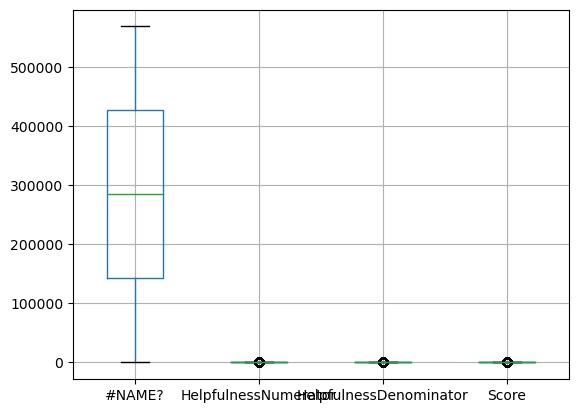

In [13]:
data.boxplot()
plt.show()

# EDA

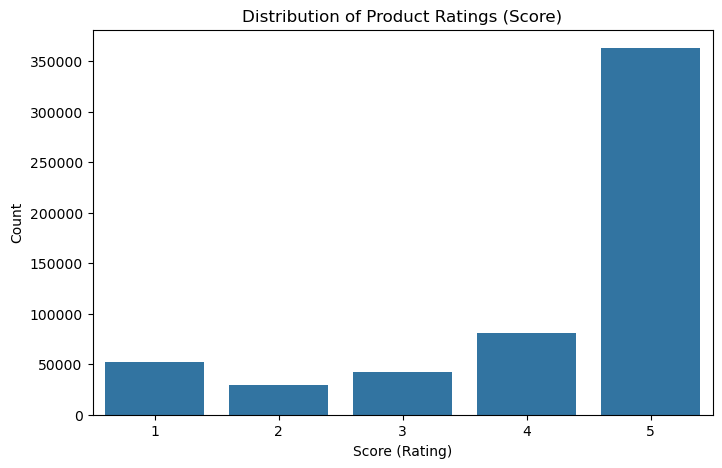

In [14]:
# Distribution of product ratings (Score)
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Score')
plt.title('Distribution of Product Ratings (Score)')
plt.xlabel('Score (Rating)')
plt.ylabel('Count')
plt.show()

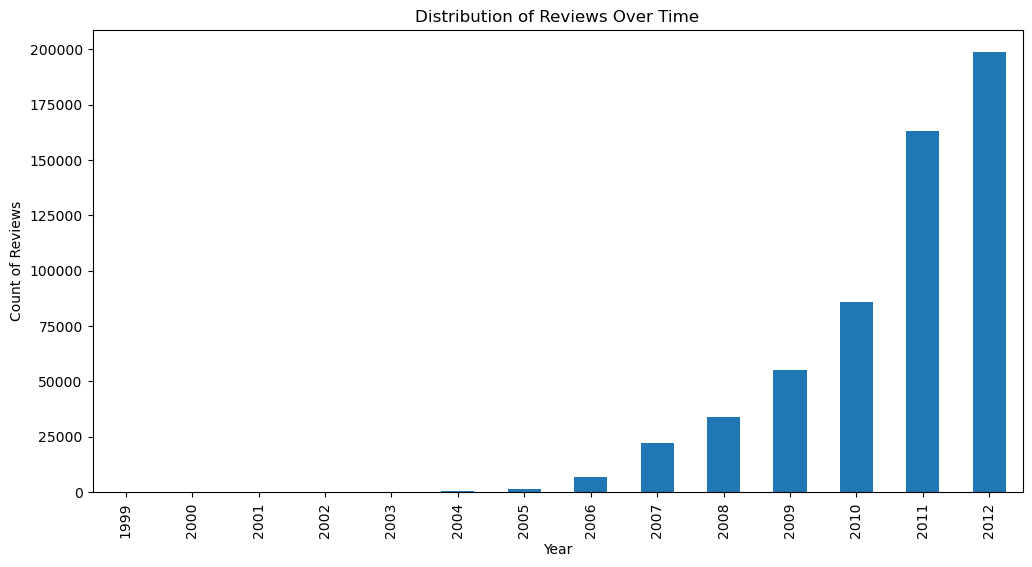

In [15]:
# Distribution of reviews over time
plt.figure(figsize=(12, 6))
data['Time'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Count of Reviews')
plt.show()

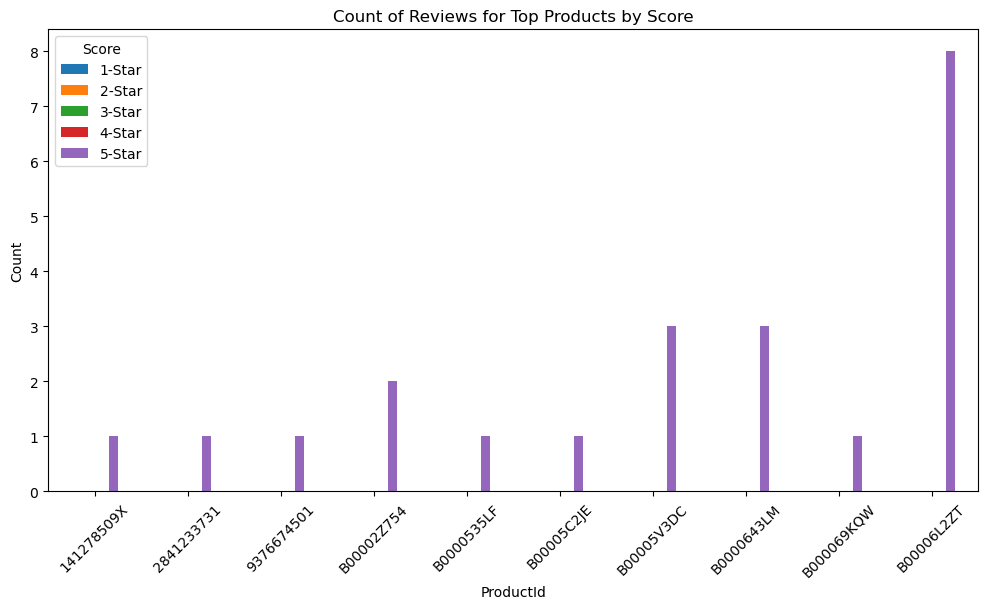

In [16]:
category_counts = data.groupby(['ProductId', 'Score']).size().unstack(fill_value=0)

category_counts.reset_index()


top_rated_products = data.groupby('ProductId')['Score'].mean().nlargest(10)

top_product_reviews = category_counts[category_counts.index.isin(top_rated_products.index)]

top_product_reviews.plot(kind='bar', figsize=(12, 6))
plt.title('Count of Reviews for Top Products by Score')
plt.xlabel('ProductId')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Score', loc='upper left', labels=['1-Star', '2-Star', '3-Star', '4-Star', '5-Star'])
plt.show()

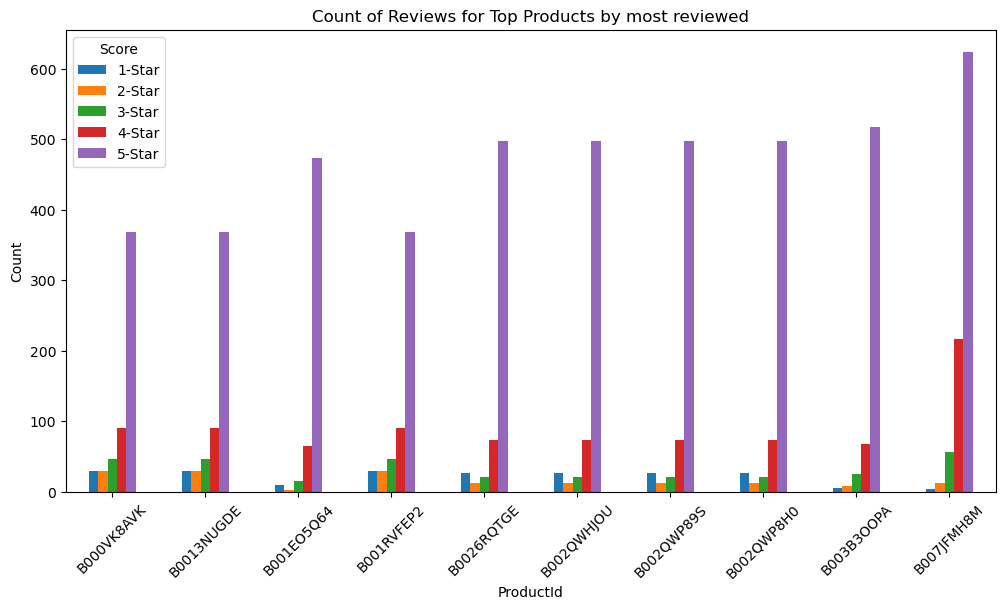

In [17]:

top_products = data.groupby('ProductId')['Score'].count().nlargest(10)

top_product_review = category_counts[category_counts.index.isin(top_products.index)]

top_product_review.plot(kind='bar', figsize=(12, 6))
plt.title('Count of Reviews for Top Products by most reviewed')
plt.xlabel('ProductId')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Score', loc='upper left', labels=['1-Star', '2-Star', '3-Star', '4-Star', '5-Star'])
plt.show()

# Text Preprocessing

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

In [34]:
df=data[["ProductId","Text","Score"]]

In [35]:
df

,ProductId,Text,Score
0,B001E4KFG0,I have bought several of the Vitality canned d...,5
1,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...,1
2,B000LQOCH0,This is a confection that has been around a fe...,4
3,B000UA0QIQ,If you are looking for the secret ingredient i...,2
4,B006K2ZZ7K,Great taffy at a great price. There was a wid...,5
...,...,...,...
568449,B001EO7N10,Great for sesame chicken..this is a good if no...,5
568450,B003S1WTCU,I'm disappointed with the flavor. The chocolat...,2
568451,B004I613EE,"These stars are small, so you can give 10-15 o...",5
568452,B004I613EE,These are the BEST treats for training and rew...,5


In [36]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_html_tags)

In [37]:
# Lowercasing
df['Text'] = df['Text'].str.lower()

In [38]:
# Tokenization
df['Tokenize_text'] = df['Text'].apply(lambda text: word_tokenize(text))

In [39]:
# Stop word removal
stop_words = set(stopwords.words('english'))
df['Filter_text'] = df['Tokenize_text'].apply(lambda tokens: 
                                              [word for word in tokens if word not in stop_words and word.isalpha()])

In [40]:
lemmatizer = WordNetLemmatizer()
df['lem_Text'] = df['Filter_text'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [41]:
# Join the tokens back into clean text
df['Preprocessed_Text'] = df['lem_Text'].apply(lambda tokens: ' '.join(tokens))

In [42]:
df

,ProductId,Text,Score,Tokenize_text,Filter_text,lem_Text,Preprocessed_Text
0,B001E4KFG0,i have bought several of the vitality canned d...,5,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,...","[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...
1,B00813GRG4,product arrived labeled as jumbo salted peanut...,1,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea...","[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanut pe...
2,B000LQOCH0,this is a confection that has been around a fe...,4,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy...","[confection, around, century, light, pillowy, ...",confection around century light pillowy citrus...
3,B000UA0QIQ,if you are looking for the secret ingredient i...,2,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli...","[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...
4,B006K2ZZ7K,great taffy at a great price. there was a wid...,5,"[great, taffy, at, a, great, price, ., there, ...","[great, taffy, great, price, wide, assortment,...","[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...
568449,B001EO7N10,great for sesame chicken..this is a good if no...,5,"[great, for, sesame, chicken, .., this, is, a,...","[great, sesame, chicken, good, better, restura...","[great, sesame, chicken, good, better, restura...",great sesame chicken good better resturants ea...
568450,B003S1WTCU,i'm disappointed with the flavor. the chocolat...,2,"[i, 'm, disappointed, with, the, flavor, ., th...","[disappointed, flavor, chocolate, notes, espec...","[disappointed, flavor, chocolate, note, especi...",disappointed flavor chocolate note especially ...
568451,B004I613EE,"these stars are small, so you can give 10-15 o...",5,"[these, stars, are, small, ,, so, you, can, gi...","[stars, small, give, one, training, session, t...","[star, small, give, one, training, session, tr...",star small give one training session tried tra...
568452,B004I613EE,these are the best treats for training and rew...,5,"[these, are, the, best, treats, for, training,...","[best, treats, training, rewarding, dog, good,...","[best, treat, training, rewarding, dog, good, ...",best treat training rewarding dog good groomin...


In [43]:
df[0:1]["Preprocessed_Text"]

0    bought several vitality canned dog food produc...
Name: Preprocessed_Text, dtype: object

In [44]:
df[0:1]["Text"]

0    i have bought several of the vitality canned d...
Name: Text, dtype: object

## Rating Segmentation

In [45]:
def classify_score(score):
    if score in [4, 5]:
        return "Positive"
    elif score in [1, 2]:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Score'].apply(classify_score)

In [46]:
df

,ProductId,Text,Score,Tokenize_text,Filter_text,lem_Text,Preprocessed_Text,Sentiment
0,B001E4KFG0,i have bought several of the vitality canned d...,5,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,...","[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,Positive
1,B00813GRG4,product arrived labeled as jumbo salted peanut...,1,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea...","[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanut pe...,Negative
2,B000LQOCH0,this is a confection that has been around a fe...,4,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy...","[confection, around, century, light, pillowy, ...",confection around century light pillowy citrus...,Positive
3,B000UA0QIQ,if you are looking for the secret ingredient i...,2,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli...","[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...,Negative
4,B006K2ZZ7K,great taffy at a great price. there was a wid...,5,"[great, taffy, at, a, great, price, ., there, ...","[great, taffy, great, price, wide, assortment,...","[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...,Positive
...,...,...,...,...,...,...,...,...
568449,B001EO7N10,great for sesame chicken..this is a good if no...,5,"[great, for, sesame, chicken, .., this, is, a,...","[great, sesame, chicken, good, better, restura...","[great, sesame, chicken, good, better, restura...",great sesame chicken good better resturants ea...,Positive
568450,B003S1WTCU,i'm disappointed with the flavor. the chocolat...,2,"[i, 'm, disappointed, with, the, flavor, ., th...","[disappointed, flavor, chocolate, notes, espec...","[disappointed, flavor, chocolate, note, especi...",disappointed flavor chocolate note especially ...,Negative
568451,B004I613EE,"these stars are small, so you can give 10-15 o...",5,"[these, stars, are, small, ,, so, you, can, gi...","[stars, small, give, one, training, session, t...","[star, small, give, one, training, session, tr...",star small give one training session tried tra...,Positive
568452,B004I613EE,these are the best treats for training and rew...,5,"[these, are, the, best, treats, for, training,...","[best, treats, training, rewarding, dog, good,...","[best, treat, training, rewarding, dog, good, ...",best treat training rewarding dog good groomin...,Positive


In [47]:
final=df[["ProductId","Preprocessed_Text","Sentiment"]]

In [48]:
final

,ProductId,Preprocessed_Text,Sentiment
0,B001E4KFG0,bought several vitality canned dog food produc...,Positive
1,B00813GRG4,product arrived labeled jumbo salted peanut pe...,Negative
2,B000LQOCH0,confection around century light pillowy citrus...,Positive
3,B000UA0QIQ,looking secret ingredient robitussin believe f...,Negative
4,B006K2ZZ7K,great taffy great price wide assortment yummy ...,Positive
...,...,...,...
568449,B001EO7N10,great sesame chicken good better resturants ea...,Positive
568450,B003S1WTCU,disappointed flavor chocolate note especially ...,Negative
568451,B004I613EE,star small give one training session tried tra...,Positive
568452,B004I613EE,best treat training rewarding dog good groomin...,Positive


# Model 

## Data Preparation

In [49]:
#Splitting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final["Preprocessed_Text"], df['Sentiment'], test_size=0.2, random_state=42)

In [113]:
# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.005,max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [114]:
X_train_tfidf

<454728x1079 sparse matrix of type '<class 'numpy.float64'>'
	with 10779885 stored elements in Compressed Sparse Row format>

In [115]:
X_test_tfidf

<113683x1079 sparse matrix of type '<class 'numpy.float64'>'
	with 2692692 stored elements in Compressed Sparse Row format>

In [66]:
X_test_tfidf

,able,absolutely,acid,across,actual,actually,add,added,addicted,adding,...,wow,wrapped,wrong,year,yellow,yes,yet,yogurt,yum,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.146375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.130838,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113678,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.157067
113679,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
113680,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
113681,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=2000,multi_class="multinomial")
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [68]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model_lr.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [69]:
print("Logistic Regression classifier accuracy: ",accuracy*100)

Logistic Regression classifier accuracy:  84.78048608850928


In [70]:
print(report)

              precision    recall  f1-score   support

    Negative       0.69      0.58      0.63     16375
     Neutral       0.47      0.12      0.19      8296
    Positive       0.88      0.96      0.92     89012

    accuracy                           0.85    113683
   macro avg       0.68      0.56      0.58    113683
weighted avg       0.82      0.85      0.83    113683



In [136]:
## Random forest and Decision Tree classifier were taking too much time to fit the data

## Neural Network using keras

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [127]:
from scipy.sparse import find, csr_matrix

X_train_tfidf = csr_matrix(X_train_tfidf)
X_test_tfidf = csr_matrix(X_test_tfidf)

X_train_tfidf.sort_indices()
X_test_tfidf.sort_indices()

In [128]:
X_train_tfidf

<454728x1079 sparse matrix of type '<class 'numpy.float64'>'
	with 10779885 stored elements in Compressed Sparse Row format>

In [116]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [117]:
y_train_cat=to_categorical(y_train_encoded)
y_test_cat=to_categorical(y_test_encoded)

In [119]:
y_train_cat

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [129]:
model_nn=Sequential()
model_nn.add(Input(1079))

In [130]:
model_nn.add(Dense(600, activation='relu'))
model_nn.add(Dense(569, activation='relu'))
model_nn.add(Dense(750, activation='relu'))
model_nn.add(Dense(800, activation='relu'))

In [131]:
model_nn.add(Dense(units=3, activation='softmax'))

In [132]:
model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nn.fit(X_train_tfidf, y_train_cat, epochs=5, batch_size=5000, validation_data=(X_test_tfidf,y_test_cat))

Epoch 1/5
91/91 [==============================] - 17s 162ms/step - loss: 0.6314 - accuracy: 0.7653 - val_loss: 0.4036 - val_accuracy: 0.8493
Epoch 2/5
91/91 [==============================] - 17s 167ms/step - loss: 0.3761 - accuracy: 0.8595 - val_loss: 0.3387 - val_accuracy: 0.8775
Epoch 3/5
91/91 [==============================] - 17s 178ms/step - loss: 0.2570 - accuracy: 0.9098 - val_loss: 0.3196 - val_accuracy: 0.8895
Epoch 4/5
91/91 [==============================] - 16s 166ms/step - loss: 0.1572 - accuracy: 0.9490 - val_loss: 0.3502 - val_accuracy: 0.8896
Epoch 5/5
91/91 [==============================] - 17s 163ms/step - loss: 0.0921 - accuracy: 0.9720 - val_loss: 0.4172 - val_accuracy: 0.8821


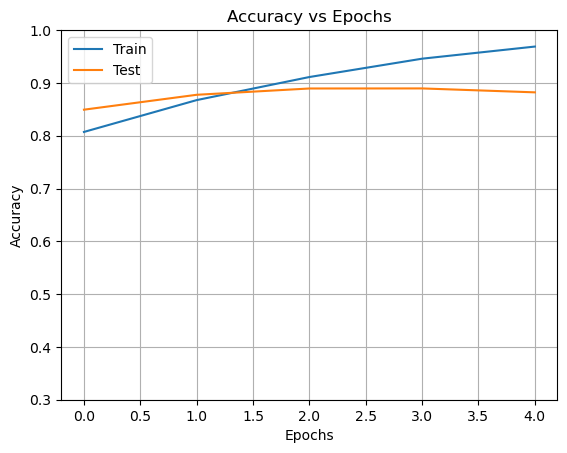

In [133]:
train_acc = model_nn.history.history["accuracy"]
val_acc = model_nn.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.ylim(0.3,1)
plt.legend(["Train", "Test"])
plt.grid()
plt.title("Accuracy vs Epochs")
plt.show()

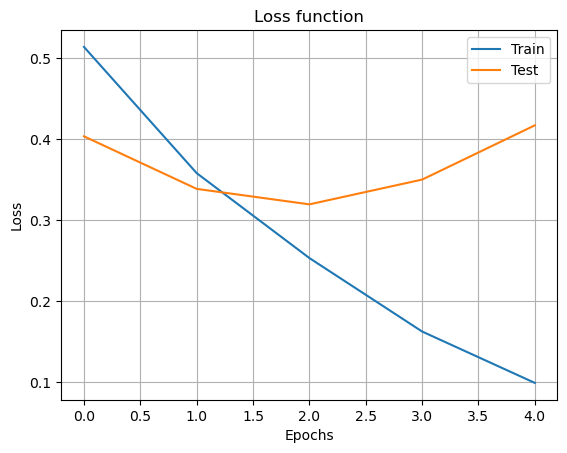

In [134]:
train_loss = model_nn.history.history["loss"]
val_loss = model_nn.history.history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.ylim((0,250))
plt.legend(["Train", "Test"])
plt.grid()
plt.title("Loss function")
plt.show()